# Cohort
### 데이터 분석 시 자주 사용되는 동질집단 분석 기법
---

시간의 경과에 따른 고객 세분화를 통한 
* 특정집단 유지 / 이탈패턴 파악
* 집단 간 상이한 행동패턴 비교
* 분석하여 인사이트 도출

In [ ]:
# 프로그램 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
# 라이브러리 설치
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from datetime import datetime, timedelta
from dateutil.relativedelta import  relativedelta

## 데이터 불러오기

In [2]:
regdata = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vThv5wwUNupMtZiidp3lmvU5xIGM3HHsekZS9YcRs8_qZjAX7yWWuuHUHjgkHl3FnRk_qjlk60lrZ2A/pub?gid=1656672941&single=true&output=csv')
dropdata = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQMs9pvwRK-DsvnOij32epTQ7mOMzQeMo5CpUv30xu8E4En7I926H5ynok-rHiue9ZC8MIyg5qQaMNY/pub?gid=423513715&single=true&output=csv')

In [3]:
regdata.head() # 월별결제

,YearMonth,TopOrderNo,OrderNo,EventNo,PriceType,CmsWay,CLecture_Code,MonoPackCode,Promo_Code,DcCoupon,...,CmsManage,Comment,PayWay,Amount,RegDate,ExpDate,StartDate,EndDate,Grade,InsertDate
0,202206,T022060100249,2.020000e+12,NaN,P,NaN,NaN,0,0,0,...,NaN,NaN,R,1900-01-01,2022-06-01,2024-06-29,2022-06-01,2024-06-29,2.0,17:12.3
1,202206,G022060902711,2.020000e+12,NaN,P,NaN,NaN,0,0,0,...,NaN,NaN,R,1900-01-01,2022-06-10,2022-09-07,2022-06-10,2022-09-07,3.0,17:12.3
2,202206,T022061002779,2.020000e+12,NaN,P,NaN,NaN,0,0,0,...,NaN,NaN,R,1900-01-01,2022-09-01,2024-08-30,2022-09-01,2024-08-30,1.0,17:12.3
3,202206,G022061602725,2.020000e+12,NaN,P,NaN,NaN,0,0,0,...,NaN,NaN,R,1900-01-01,2022-07-08,2024-07-06,2022-07-08,2024-07-06,1.0,17:12.3
4,202206,G022061503149,2.020000e+12,NaN,P,NaN,NaN,0,0,0,...,NaN,NaN,R,1900-01-01,2022-06-15,2024-06-21,2022-06-15,2024-06-13,1.0,17:12.3


In [4]:
regdata.columns

Index(['YearMonth', 'TopOrderNo', 'OrderNo', 'EventNo', 'PriceType', 'CmsWay',
       'CLecture_Code', 'MonoPackCode', 'Promo_Code', 'DcCoupon', 'DcPoint',
       'RelayChk', 'Status', 'CancelDate', 'CreateDate', 'ReceiptDate',
       'InputDate', 'BuyType', 'CmsManage', 'Comment', 'PayWay', 'Amount',
       'RegDate', 'ExpDate', 'StartDate', 'EndDate', 'Grade', 'InsertDate'],
      dtype='object')

In [5]:
regdata['Amount'].unique()

array(['1900-01-01'], dtype=object)

In [6]:
dropdata.head() # 월별 취소 환불

,YearMonth,TopOrderNo,OrderNo,EventNo,PriceType,CmsWay,CLecture_Code,MonoPackCode,Promo_Code,RelayChk,...,CmsManage,Comment,PayWay,Amount,RegDate,ExpDate,StartDate,EndDate,Grade,InsertDate
0,202210,T022102101931,2.020000e+12,NaN,P,NaN,NaN,0,0,0,...,NaN,NaN,R,1,2022-10-21,2024-11-18,2022-10-21,2024-11-18,2.0,17:09.6
1,202210,G022100701924,2.020000e+12,NaN,P,NaN,NaN,0,0,0,...,NaN,NaN,R,1,2022-10-24,2023-07-20,2022-10-24,2023-07-20,2.0,17:09.6
2,202210,T022102602667,2.020000e+12,NaN,P,NaN,NaN,0,0,0,...,NaN,NaN,R,1,2022-10-26,2024-10-26,2022-10-26,2024-10-24,6.0,17:09.6
3,202210,T022102900092,2.020000e+12,NaN,P,NaN,NaN,0,0,0,...,NaN,NaN,R,1,2022-10-29,2024-10-27,2022-10-29,2024-10-27,1.0,17:09.6
4,202210,T022102900101,2.020000e+12,NaN,P,NaN,NaN,0,0,0,...,NaN,NaN,R,1,2022-10-29,2024-11-26,2022-10-29,2024-11-26,1.0,17:09.6


In [7]:
dropdata['Amount'].unique()

array([1], dtype=int64)

In [8]:
dropdata.columns # DcCoupon 가 없음

Index(['YearMonth', 'TopOrderNo', 'OrderNo', 'EventNo', 'PriceType', 'CmsWay',
       'CLecture_Code', 'MonoPackCode', 'Promo_Code', 'RelayChk', 'Status',
       'CmsProcessCode', 'CancelDate', 'CreateDate', 'ReceiptDate',
       'InputDate', 'BuyType', 'CmsManage', 'Comment', 'PayWay', 'Amount',
       'RegDate', 'ExpDate', 'StartDate', 'EndDate', 'Grade', 'InsertDate'],
      dtype='object')

## 데이터 전처리

In [11]:
regdata[regdata['TopOrderNo']=='G022060902711']

,YearMonth,TopOrderNo,OrderNo,EventNo,PriceType,CmsWay,CLecture_Code,MonoPackCode,Promo_Code,DcCoupon,...,CmsManage,Comment,PayWay,Amount,RegDate,ExpDate,StartDate,EndDate,Grade,InsertDate
1,202206,G022060902711,2.020000e+12,NaN,P,NaN,NaN,0,0,0,...,NaN,NaN,R,1900-01-01,2022-06-10,2022-09-07,2022-06-10,2022-09-07,3.0,17:12.3


In [12]:
dropdata[dropdata['TopOrderNo']=='G022060902711']

,YearMonth,TopOrderNo,OrderNo,EventNo,PriceType,CmsWay,CLecture_Code,MonoPackCode,Promo_Code,RelayChk,...,CmsManage,Comment,PayWay,Amount,RegDate,ExpDate,StartDate,EndDate,Grade,InsertDate
15507,202207,G022060902711,2.020000e+12,NaN,P,NaN,NaN,0,0,0,...,NaN,NaN,R,1,2022-06-10,2022-09-07,2022-06-10,2022-09-07,3.0,17:30.0


In [13]:
dropdata[dropdata['TopOrderNo']=='T022060100249']

,YearMonth,TopOrderNo,OrderNo,EventNo,PriceType,CmsWay,CLecture_Code,MonoPackCode,Promo_Code,RelayChk,...,CmsManage,Comment,PayWay,Amount,RegDate,ExpDate,StartDate,EndDate,Grade,InsertDate


In [ ]:
# regdata에는 전체 가입한 테이블
# dropdata는 취소한 사람들만 있는 테이블

In [15]:
regdata = regdata[['TopOrderNo','ReceiptDate','StartDate','EndDate']]
dropdata = dropdata[['TopOrderNo','CancelDate']] 
# 주문번호, 주문일, 가입일, 시작일, 종료일, 취소일

In [17]:
data = pd.merge(left=regdata, right=dropdata, how='left', on='TopOrderNo')
data

,TopOrderNo,ReceiptDate,StartDate,EndDate,CancelDate
0,T022060100249,20220601,2022-06-01,2024-06-29,NaN
1,G022060902711,20220609,2022-06-10,2022-09-07,2022-07-13
2,T022061002779,20220610,2022-09-01,2024-08-30,NaN
3,G022061602725,20220616,2022-07-08,2024-07-06,2023-02-20
4,G022061503149,20220615,2022-06-15,2024-06-13,2022-09-01
...,...,...,...,...,...
51048,T022080800049,20220808,2022-08-08,2023-02-03,NaN
51049,T022080800049,20220808,2022-08-08,2022-09-21,NaN
51050,T022081102200,20220811,2022-08-11,2023-02-06,NaN
51051,T022083102370,20220831,2022-08-31,2024-08-29,NaN


In [18]:
# 자료형 변환 (날짜형)
for i in range(1,5):
    data.iloc[:,i] = pd.to_datetime(data.iloc[:,i].astype('str'), format='%Y-%m-%d')

In [ ]:
NaN -> NaT

In [19]:
pd.to_datetime(np.nan)

NaT

In [20]:
# 필터링 (계약기간)
data['Diff'] = ((data['EndDate'] - data['StartDate'] ) / np.timedelta64(1, 'M')).astype('int')
data = data[data['Diff']>=23].reset_index(drop=True)
data

,TopOrderNo,ReceiptDate,StartDate,EndDate,CancelDate,Diff
0,T022060100249,2022-06-01,2022-06-01,2024-06-29,NaT,24
1,T022061002779,2022-06-10,2022-09-01,2024-08-30,NaT,23
2,G022061602725,2022-06-16,2022-07-08,2024-07-06,2023-02-20,23
3,G022061503149,2022-06-15,2022-06-15,2024-06-13,2022-09-01,23
4,T022063005999,2022-06-30,2022-09-22,2024-09-20,NaT,23
...,...,...,...,...,...,...
45438,T022083102387,2022-08-31,2022-08-31,2024-08-29,2022-09-29,23
45439,T022083102337,2022-08-31,2022-09-23,2024-09-21,NaT,23
45440,T022082402610,2022-08-24,2022-10-06,2024-10-04,NaT,23
45441,T022083102370,2022-08-31,2022-08-31,2024-08-29,NaT,23


In [21]:
# 필터링 (대상기간)
display(data[data['ReceiptDate']>=pd.to_datetime('2022-11-01')])    # 가입일
data.loc[(data.CancelDate >= pd.to_datetime('2022-11-01')), 'CancelDate']=pd.to_datetime(np.nan)    # 이탈일
data[data['ReceiptDate']>data['CancelDate']]    # 가입일 > 이탈일

,TopOrderNo,ReceiptDate,StartDate,EndDate,CancelDate,Diff


,TopOrderNo,ReceiptDate,StartDate,EndDate,CancelDate,Diff


In [22]:
# 필터링 (중복)
data.drop_duplicates(['TopOrderNo'], keep='last', inplace=True)
data.reset_index(drop=True, inplace=True)
data[data.duplicated(subset=['TopOrderNo'])==True]

,TopOrderNo,ReceiptDate,StartDate,EndDate,CancelDate,Diff


## 데이터 계산
1. 누적이탈율
2. 코호트 그룹 생성

In [23]:
# 일 -> 월 전환
data['Receiptym'] = data['ReceiptDate'].dt.strftime('%Y-%m')
data['Cancelym'] = data['CancelDate'].dt.strftime('%Y-%m')

# 가입수 이탈수
regcnt = data.groupby(['Receiptym'])['TopOrderNo'].aggregate(['count']).reset_index()
dropcnt = data.groupby(['Receiptym','Cancelym'])['TopOrderNo'].aggregate(['count']).reset_index()

In [24]:
# 누락확인
# 가입월 누락확인
startdate = pd.to_datetime('2020-11-01')
term = 24
# 가입대상 월
regmonth = []
for i in range(term):
    regmonth.append(datetime.strftime(startdate + pd.DateOffset(months=i), '%Y-%m'))
# 가입월 누락 처리
for i in range(term):
    try:
        if regcnt['Receiptym'][i] == regmonth[i]:
            pass
        else:
            newrow = pd.DataFrame([[regmonth[i], np.nan]], columns = regcnt.columns)
            print(newrow)
            regcnt = pd.concat([regcnt.iloc[:i], newrow, regcnt.iloc[i:]], ignore_index=True)
    except KeyError:
        regcnt = regcnt.append({'Receiptym':regmonth[i], 'count':0}, ignore_index=True)
# regcnt.to_excel('regcnt.xlsx')


# 이탈월 누락확인
# 이탈대상 월
dropmonth = []
for i in range(term):
    sublist = []
    for j in range(term-i):
        sublist.append(datetime.strftime(pd.to_datetime(regmonth[i])+pd.DateOffset(months=j), '%Y-%m'))
    dropmonth.append(sublist)
# 이탈월 누락 처리
for i in range(term):
    dataidx = int(i*(2*24-i+1)/2)
    for j in range(term-i):
        try:
            if dropcnt['Receiptym'][dataidx+j] == regmonth[i]:
                if dropcnt['Cancelym'][dataidx+j] == dropmonth[i][j]:
                    pass
                else:
                    newrow = pd.DataFrame([[regmonth[i], dropmonth[i][j], 0]], columns = dropcnt.columns)
                    dropcnt = pd.concat([dropcnt.iloc[:dataidx+j], newrow, dropcnt.iloc[dataidx+j:]], ignore_index=True)
            else:
                newrow = pd.DataFrame([[regmonth[i], dropmonth[i][j], 0]], columns = dropcnt.columns)
                dropcnt = pd.concat([dropcnt.iloc[:dataidx+j], newrow, dropcnt.iloc[dataidx+j:]], ignore_index=True)
        except KeyError:
            dropcnt = dropcnt.append({'Receiptym':regmonth[i], 'Cancelym':dropmonth[i][j], 'count':0}, ignore_index=True)
# regcnt.to_excel('regcnt.xlsx')

In [26]:
# 병합
maindata = pd.merge(left=dropcnt, right=regcnt, on='Receiptym', how='left')
maindata

,Receiptym,Cancelym,count_x,count_y
0,2020-11,2020-11,25,2305
1,2020-11,2020-12,17,2305
2,2020-11,2021-01,11,2305
3,2020-11,2021-02,41,2305
4,2020-11,2021-03,38,2305
...,...,...,...,...
295,2022-08,2022-09,18,644
296,2022-08,2022-10,19,644
297,2022-09,2022-09,20,1560
298,2022-09,2022-10,19,1560


In [27]:
# 그룹 라벨링
morder = []
for i in range(term):
    for j in range(term-i):
        morder.append(j)
maindata['morder'] = morder

In [28]:
# 누적 유지율 계산
maindata['cumsum'] = maindata.groupby((maindata.morder==0).cumsum()).count_x.cumsum()
maindata['ratio'] = round((maindata['count_y'] - maindata['cumsum']) / maindata['count_y'], 2)

In [29]:
# 피벗테이블
pivotdata = maindata.pivot_table(index='Receiptym', columns = 'morder', values='ratio')

## 데이터 시각화

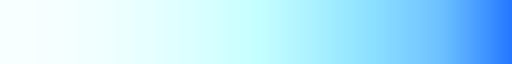

In [31]:
# 옵션설정
# 라벨
xlabel = []
for i in range(term):
    i = "M"+str(i+1)
    xlabel.append(i)

# 눈금
xticks = []
for i in range(term):
    xticks.append(i+0.5)

# 색상
colors = ['#F8FFFF', '#C6FFFF', '#90E4FF', '#6CC0FF', '#2478FF'] #368AFF
cmap = LinearSegmentedColormap.from_list('mycmap', colors, gamma=2) # gamma: 색상의 정도값이 클수록 확연하게 구분됨
cmap

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\rltmdals\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rltmdals\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rltmdals\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rltmdals\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rltmdals\anaconda3\lib\site-pa

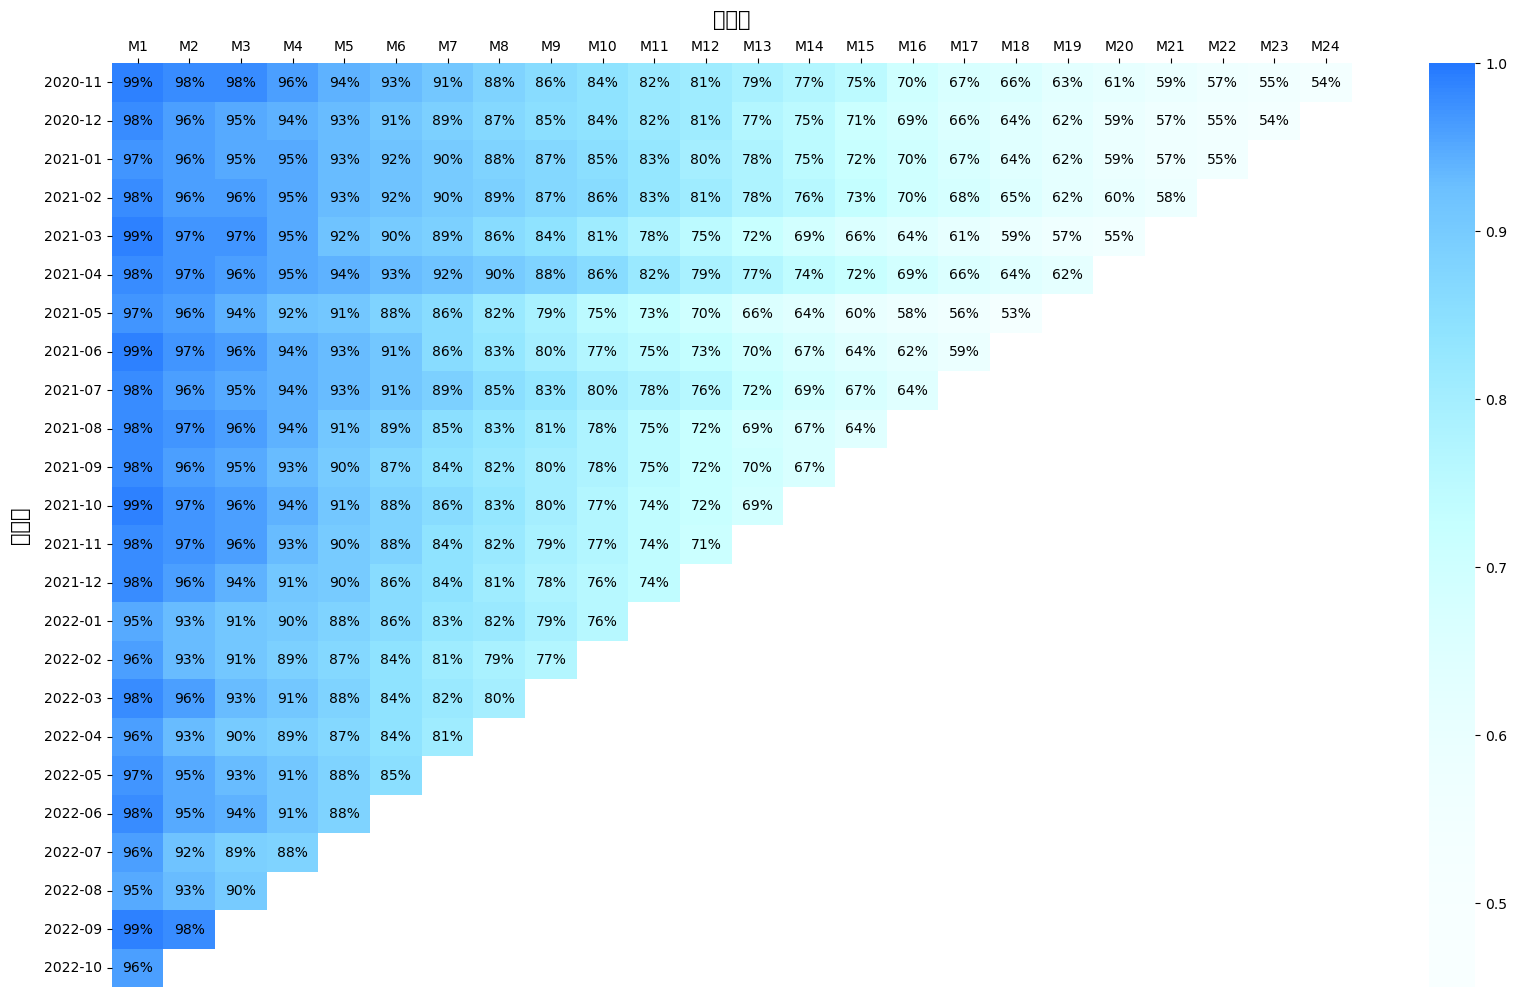

In [32]:
# 시각화
%matplotlib inline
matplotlib.rc('font', family='NanumBarunGothic') #plt.rc('font', family='NanumBarunGothic')
fig = plt.figure(figsize=(20,12))
g = sns.heatmap(pivotdata, cmap=cmap, annot=True, fmt='.0%', annot_kws={'color':'black'}, vmin=0.45, vmax=1)
# annot:수치표시 fmt:양식 annot_kws:글색 vmin:최소값 vmax:최대값
#g.set_title('유지율에 관한 코호트분석', fontsize=20, y=-0, pad=-30)
g.set_xlabel("경과월", fontsize=15, labelpad=10)
g.set_ylabel("가입월", fontsize=15, labelpad=10)
g.xaxis.set_label_position('top')
g.set_xticks(xticks)
g.set_xticklabels(xlabel)
g.xaxis.tick_top()
plt.show()
# save figure
#pic = g.get_figure()
#pic_path = 'cohort.png'
#pic.savefig(pic_path, dpi=400, bbox_inches='tight')

<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\rltmdals\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rltmdals\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rltmdals\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rltmdals\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rltmdals\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI})

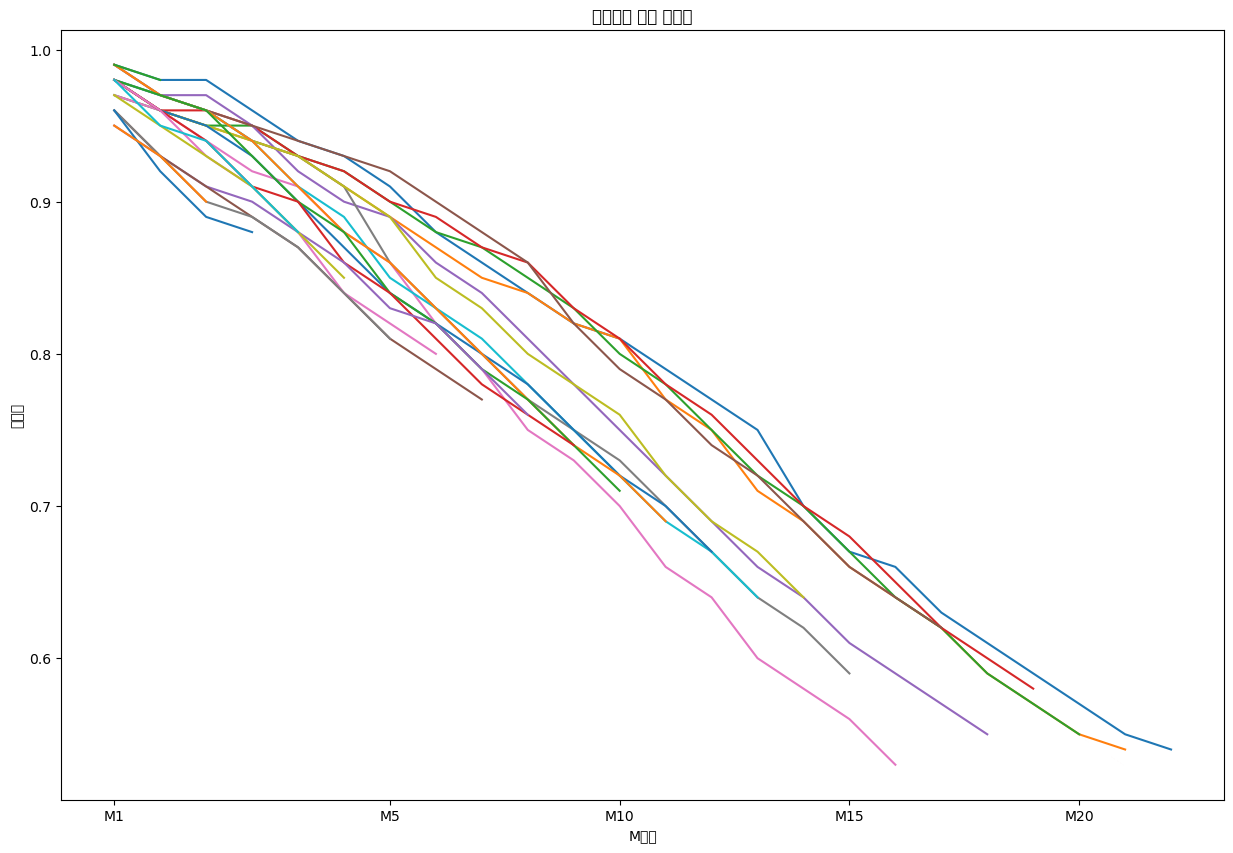

In [33]:
# 유지율 곡선
fig = plt.figure(figsize=(15,10))
for i in regmonth:
    subdata = maindata[maindata['Receiptym']==i]
    plt.plot(subdata['morder'],subdata['ratio'])
plt.title('경과월에 따른 유지율')    # fontsize pad
plt.xlabel('M경과')
plt.ylabel('유지율')
plt.xticks([0,6,11,16,21],labels=['M1','M5','M10','M15','M20'])
plt.show
#plt.savefig('plot.png')

Text(0, 0.5, '유지율')

C:\Users\rltmdals\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rltmdals\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rltmdals\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


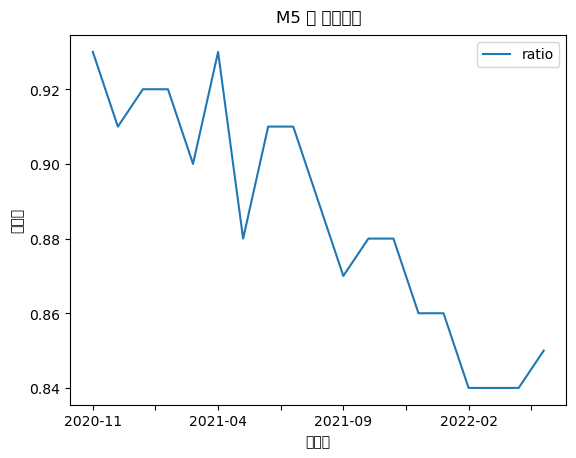

In [34]:
# Mn 곡선
m = 5
maindata[maindata['morder']==m].plot(kind='line', x='Receiptym', y='ratio')
#plt.yticks(np.arange(0.9, 1.001, 0.01))    # maindata[maindata['morder']==5]['ratio'].min() / max()
plt.title('M%d 의 유지곡선' %m, pad=10)    # %d: 정수, %s: 문자열
plt.xlabel('가입월')
plt.ylabel('유지율')

In [35]:
maindata

,Receiptym,Cancelym,count_x,count_y,morder,cumsum,ratio
0,2020-11,2020-11,25,2305,0,25,0.99
1,2020-11,2020-12,17,2305,1,42,0.98
2,2020-11,2021-01,11,2305,2,53,0.98
3,2020-11,2021-02,41,2305,3,94,0.96
4,2020-11,2021-03,38,2305,4,132,0.94
...,...,...,...,...,...,...,...
295,2022-08,2022-09,18,644,1,47,0.93
296,2022-08,2022-10,19,644,2,66,0.90
297,2022-09,2022-09,20,1560,0,20,0.99
298,2022-09,2022-10,19,1560,1,39,0.98
